# Possum Regression

__Цель работы:__ Предсказать длину тела по другим параметрам

## Подключение модулей 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Загрузка данный 

In [2]:
df = pd.read_csv("possum.csv")

In [54]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,890.0,360.0,74.5,545.0,152.0,280.0,360.0
1,2,1,0,0,6.0,92.5,57.6,915.0,365.0,72.5,512.0,160.0,285.0,330.0
2,3,1,0,0,6.0,94.0,60.0,955.0,390.0,75.4,519.0,155.0,300.0,340.0
3,4,1,0,0,6.0,93.2,57.1,920.0,380.0,76.1,522.0,152.0,280.0,340.0
4,5,1,0,0,2.0,91.5,56.3,855.0,360.0,71.0,532.0,151.0,285.0,330.0


__case__ - номер наблюдения

__site__ - Номер участка, где был пойман в ловушку опоссум.

__Pop__ - Население, как Вик (Виктория), так и другое (Новый Южный Уэльс или Квинсленд).

__sex__ - Пол: m (мужской) или f (женский).

__age__ - возраст

__hdlngth__ - Длина головы, мм.

__skullw__ - Ширина черепа, в мм.

__totlngth__ - Общая длина, см.

__taill__ - Длина хвоста, в сантиметрах.

__footlgth__ - длина стопы

__eye__ - ширина глаз 

__chest__ - обхват груди 

__belly__ - обхват живота 

__earconch__  ушная раковина

## Разведочный анализ данных

In [4]:
df['totlngth'] = df['totlngth'] * 10
df['taill'] = df['taill'] * 10
df['earconch'] = df['earconch'] * 10
df['eye'] = df['eye'] * 10
df['chest'] = df['chest'] * 10
df['belly'] = df['belly'] * 10
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,890.0,360.0,74.5,545.0,152.0,280.0,360.0
1,2,1,Vic,f,6.0,92.5,57.6,915.0,365.0,72.5,512.0,160.0,285.0,330.0
2,3,1,Vic,f,6.0,94.0,60.0,955.0,390.0,75.4,519.0,155.0,300.0,340.0
3,4,1,Vic,f,6.0,93.2,57.1,920.0,380.0,76.1,522.0,152.0,280.0,340.0
4,5,1,Vic,f,2.0,91.5,56.3,855.0,360.0,71.0,532.0,151.0,285.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,815.0,365.0,66.0,468.0,148.0,230.0,270.0
100,101,7,other,m,1.0,88.6,54.7,825.0,390.0,64.4,480.0,140.0,250.0,330.0
101,102,7,other,f,6.0,92.4,55.0,890.0,380.0,63.5,454.0,130.0,250.0,300.0
102,103,7,other,m,4.0,91.5,55.2,825.0,365.0,62.9,459.0,154.0,250.0,290.0


Поменяли значения из см в мм в столбцах totlngth, taill, earconch, eye, chest , belly 

In [5]:
df.shape

(104, 14)

14 признаков и 104 строки 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


Имеются 3 пропущенных значения 

In [7]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Здесь видим что пропущенные значения имеются в столбцах age и footlgth

In [8]:
df[df.isnull().any(axis = 1)]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,41,2,Vic,f,5.0,88.4,57.0,830.0,365.0,NaN,403.0,159.0,270.0,305.0
43,44,2,Vic,m,NaN,85.1,51.5,760.0,355.0,70.3,526.0,144.0,230.0,270.0
45,46,2,Vic,m,NaN,91.4,54.4,840.0,350.0,72.8,512.0,144.0,245.0,350.0


In [9]:
df['age']= df['age'].fillna(df['age'].mean())
df['footlgth']= df['footlgth'].fillna(df['footlgth'].mean())

In [10]:
df[df.isnull().any(axis = 1)]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


Пропущенные значения привели к среднему результату и заполнили их

In [11]:
df.duplicated().sum()

0

Дубликатов не обнаружено 

In [12]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,870.884615,370.096154,68.459223,481.307692,150.461538,270.000000,325.865385
std,30.166206,2.349086,1.890617,3.573349,3.113426,43.105494,19.595184,4.373917,41.093802,10.503742,20.455967,27.619487
min,1.000000,1.000000,1.000000,82.500000,50.000000,750.000000,320.000000,60.300000,403.000000,128.000000,220.000000,250.000000
25%,26.750000,1.000000,2.750000,90.675000,54.975000,840.000000,358.750000,64.650000,448.000000,144.000000,255.000000,310.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,880.000000,370.000000,68.100000,468.000000,149.000000,270.000000,325.000000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,900.000000,380.000000,72.500000,520.000000,157.250000,280.000000,341.250000
max,104.000000,7.000000,9.000000,103.100000,68.600000,965.000000,430.000000,77.900000,562.000000,178.000000,320.000000,400.000000


In [13]:
description = df.describe()
transposed_description = description.T
transposed_description

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,104.0,3.833333,1.890617,1.0,2.750,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,870.884615,43.105494,750.0,840.000,880.00,900.000,965.0
taill,104.0,370.096154,19.595184,320.0,358.750,370.00,380.000,430.0
footlgth,104.0,68.459223,4.373917,60.3,64.650,68.10,72.500,77.9
earconch,104.0,481.307692,41.093802,403.0,448.000,468.00,520.000,562.0
eye,104.0,150.461538,10.503742,128.0,144.000,149.00,157.250,178.0


Транспонировали таблицу

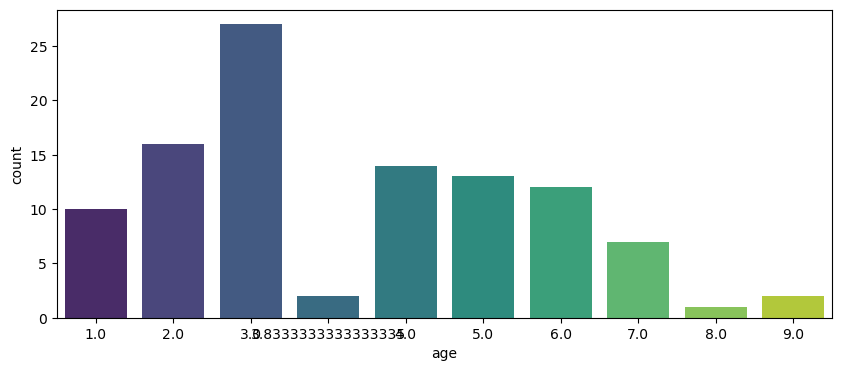

In [14]:
plt.figure(figsize=(10, 4))
plt.xticks(rotation=0)
sns.countplot(x='age', data=df, palette='viridis');

В среднем наблюдались опоссумы в возрасте от 2 до 4 лет большинству было 3 года 

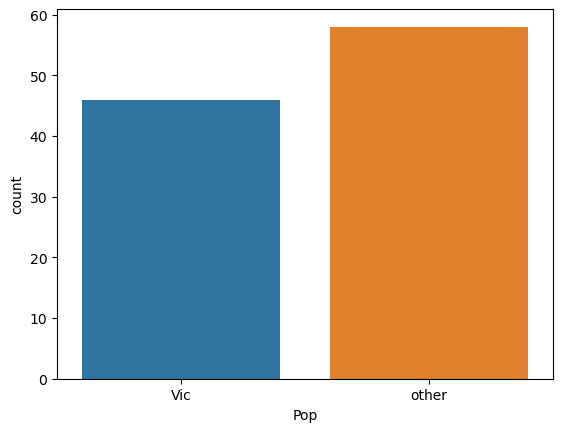

In [15]:
sns.countplot(x='Pop', data=df);

В Виктории было меньше популяции чем в других штатах

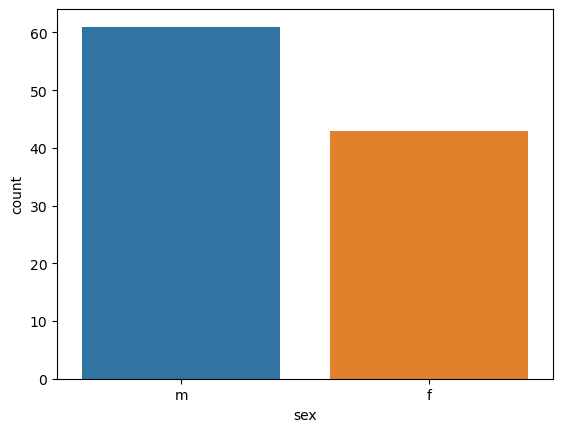

In [16]:
sns.countplot(x='sex', data=df);

Большинство опоссумов было мужского пола 

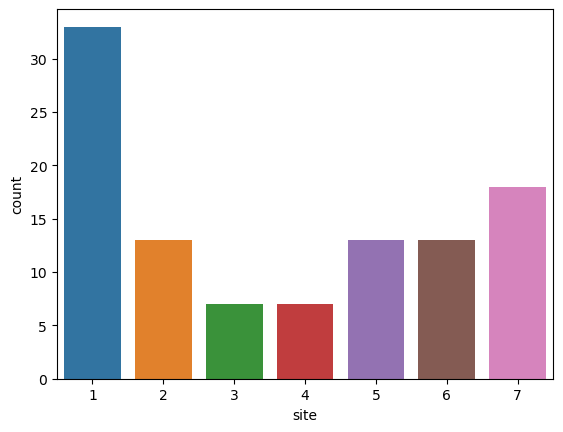

In [17]:
sns.countplot(x='site', data=df);

Всего было 7 участков отлова опоссумов, на первомы было поймано больше всего опоссумов 


<Axes: xlabel='site', ylabel='count'>

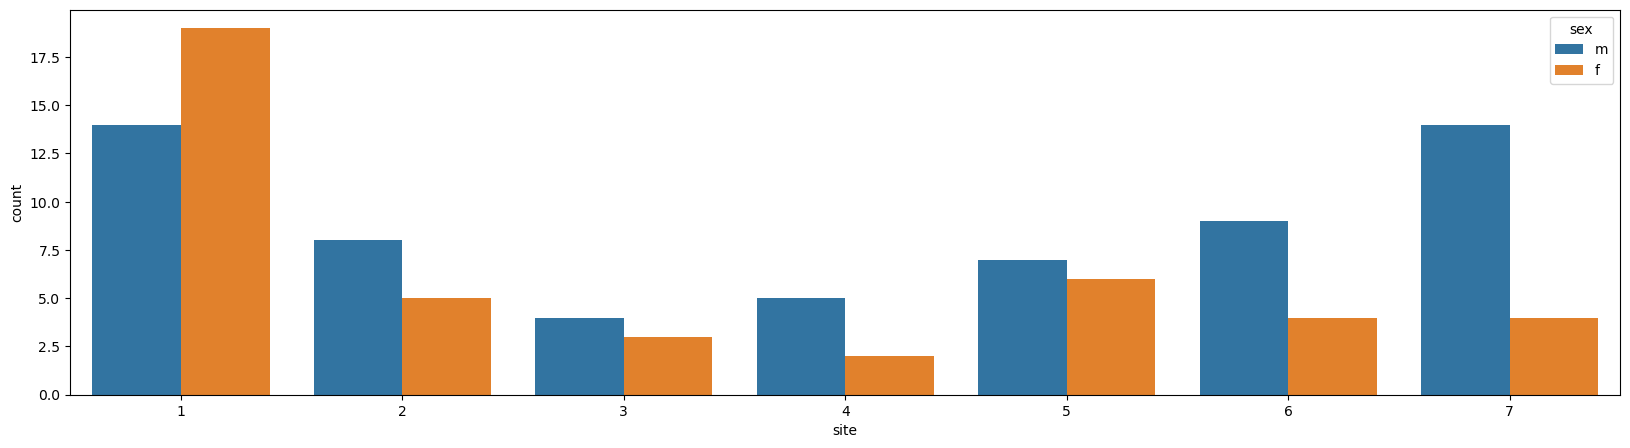

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x = df['site'],hue = df['sex'])

Здесь мы видим на каких участках было больше всего опоссумов мужского и женского пола 

<Axes: xlabel='site', ylabel='count'>

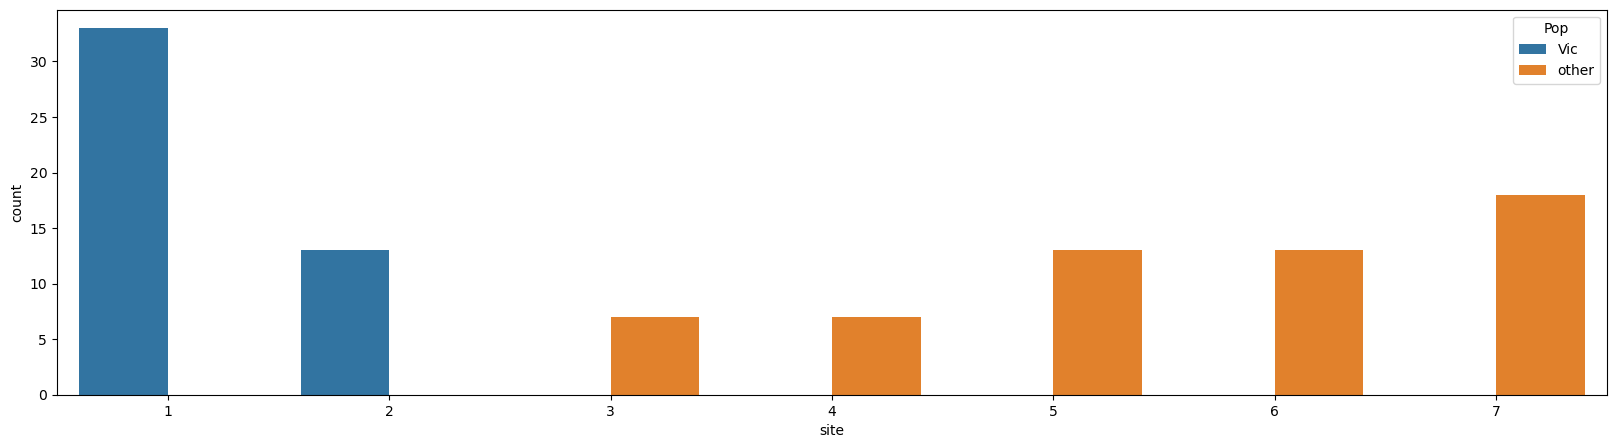

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['site'],hue = df['Pop'])

На первом и втором участке была популяция опоссумов Штата Виктория

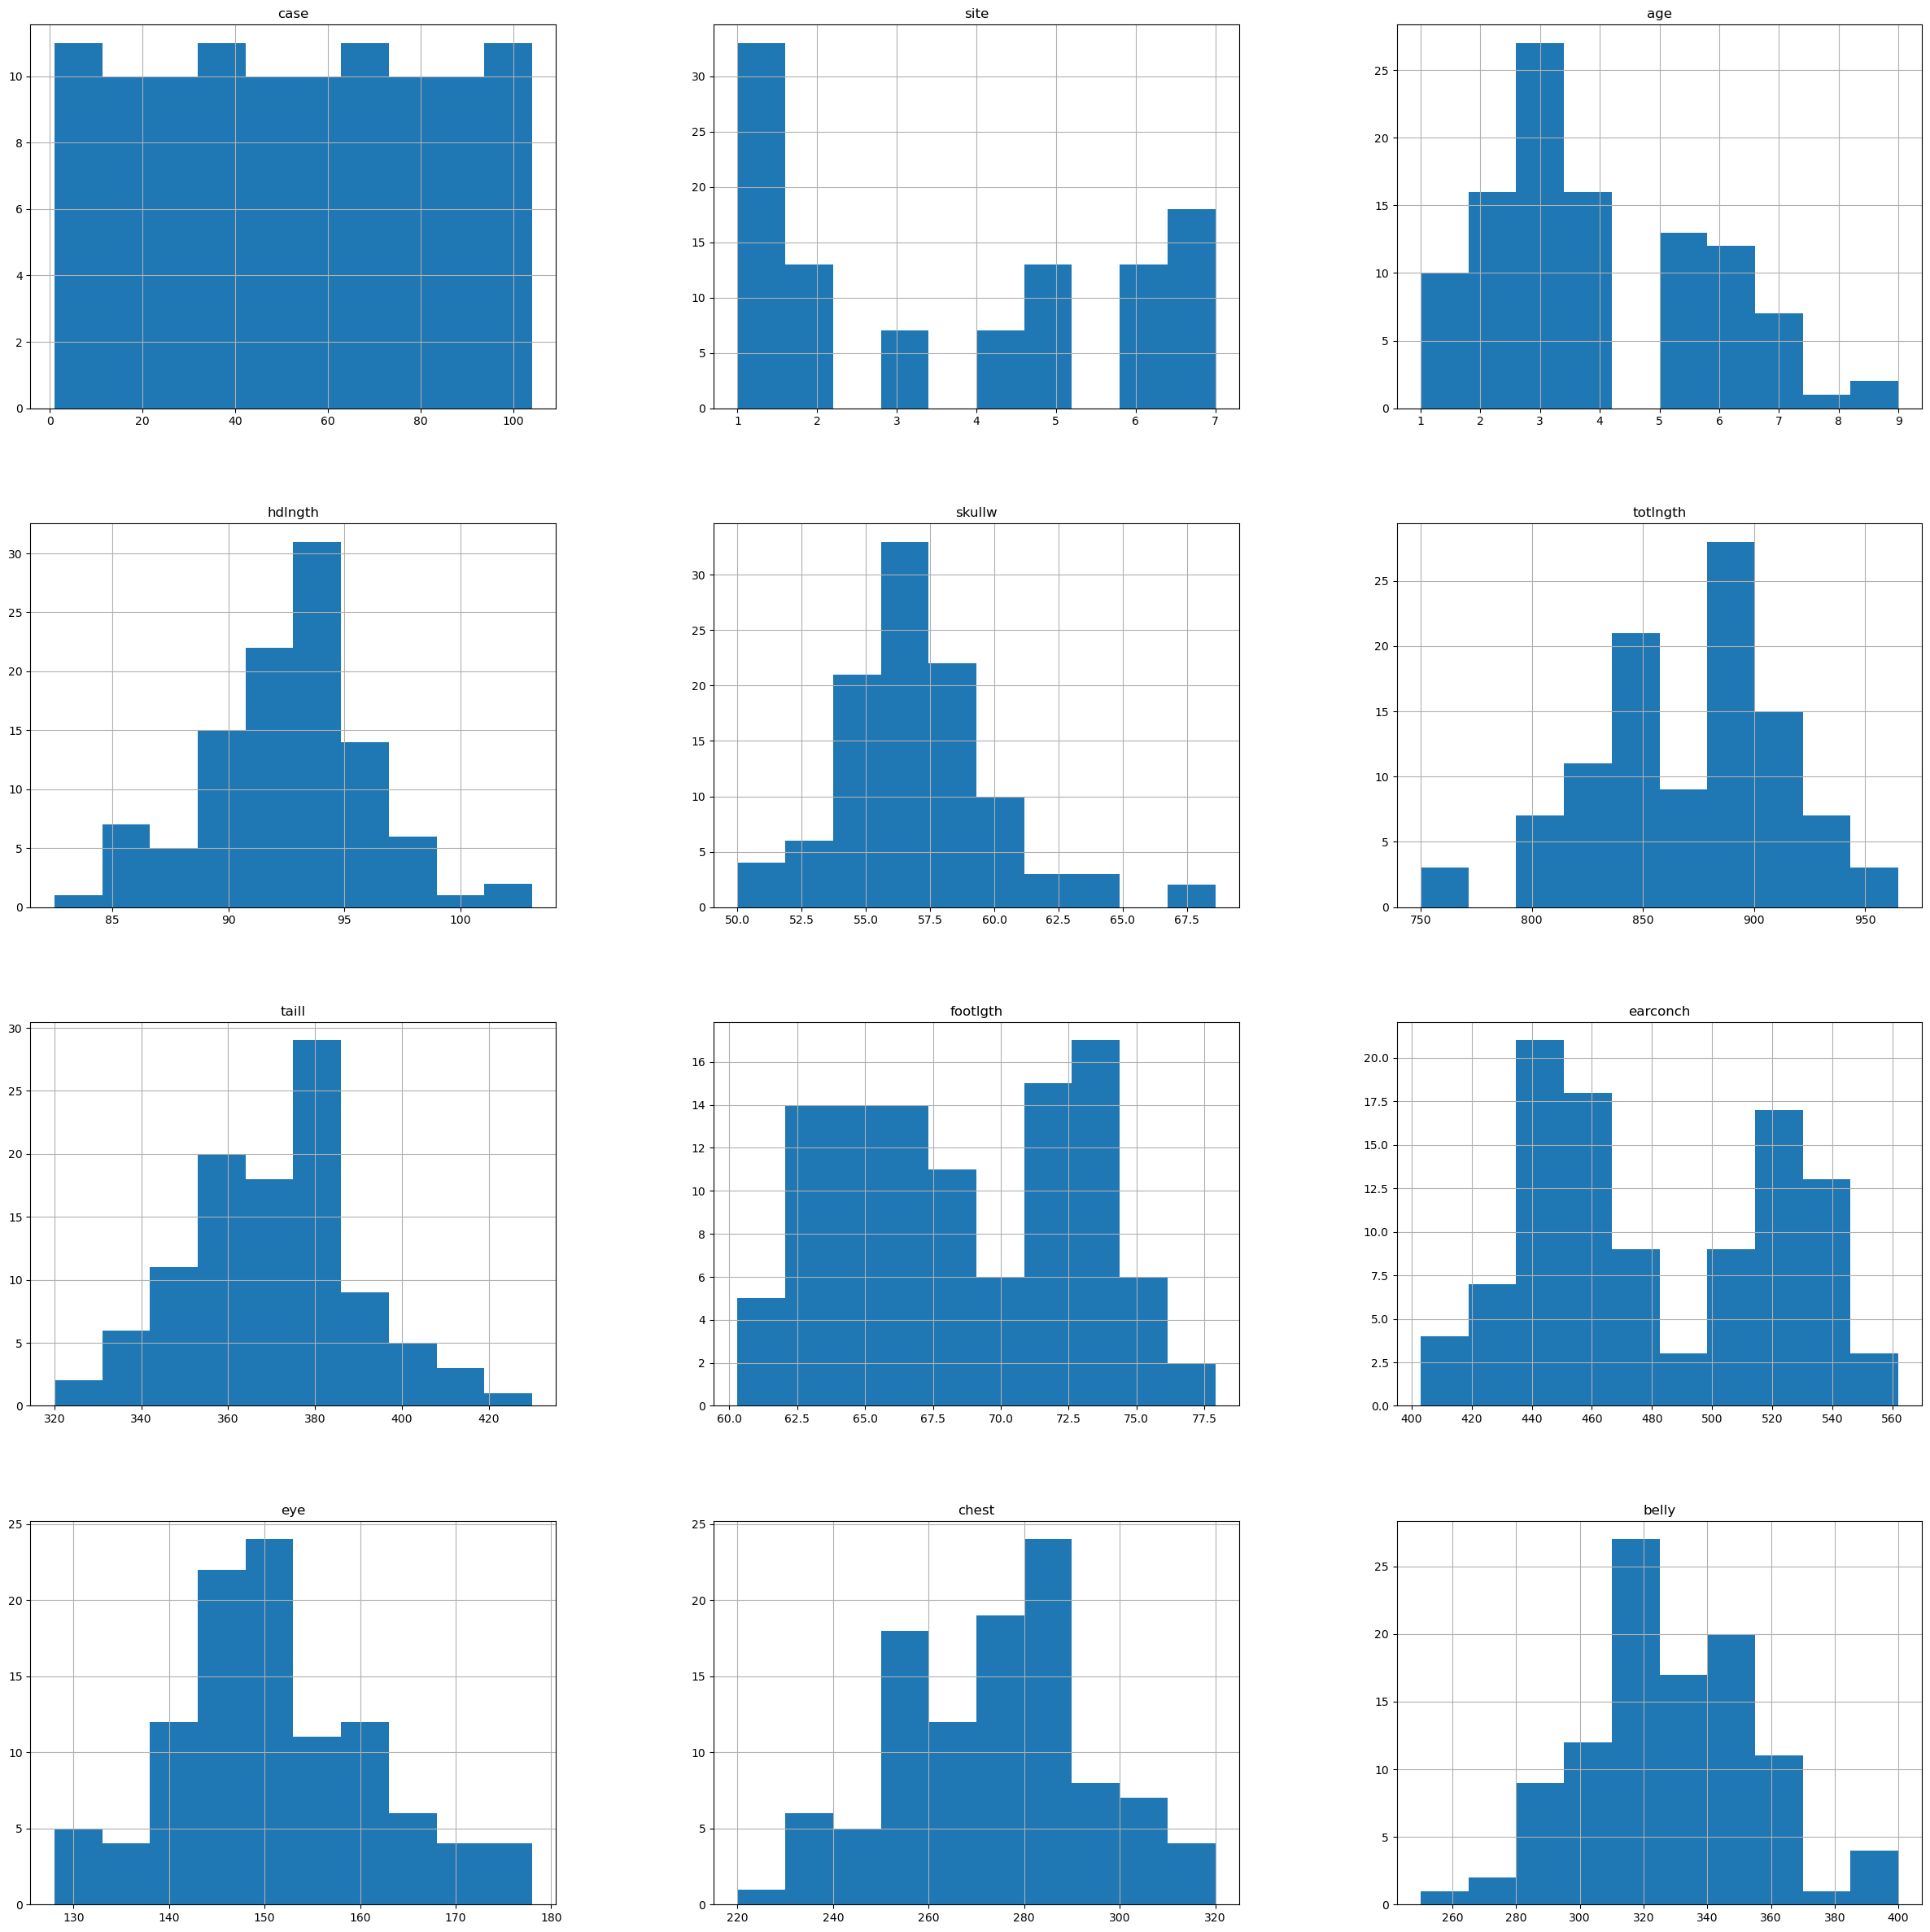

In [20]:
df.hist(figsize=(30, 30));

Здесь мы видим нормальное распределение 

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Pop'] = labelencoder.fit_transform(df['Pop'])

df['sex'] = labelencoder.fit_transform(df['sex'])


Закодировали данные населения и пола

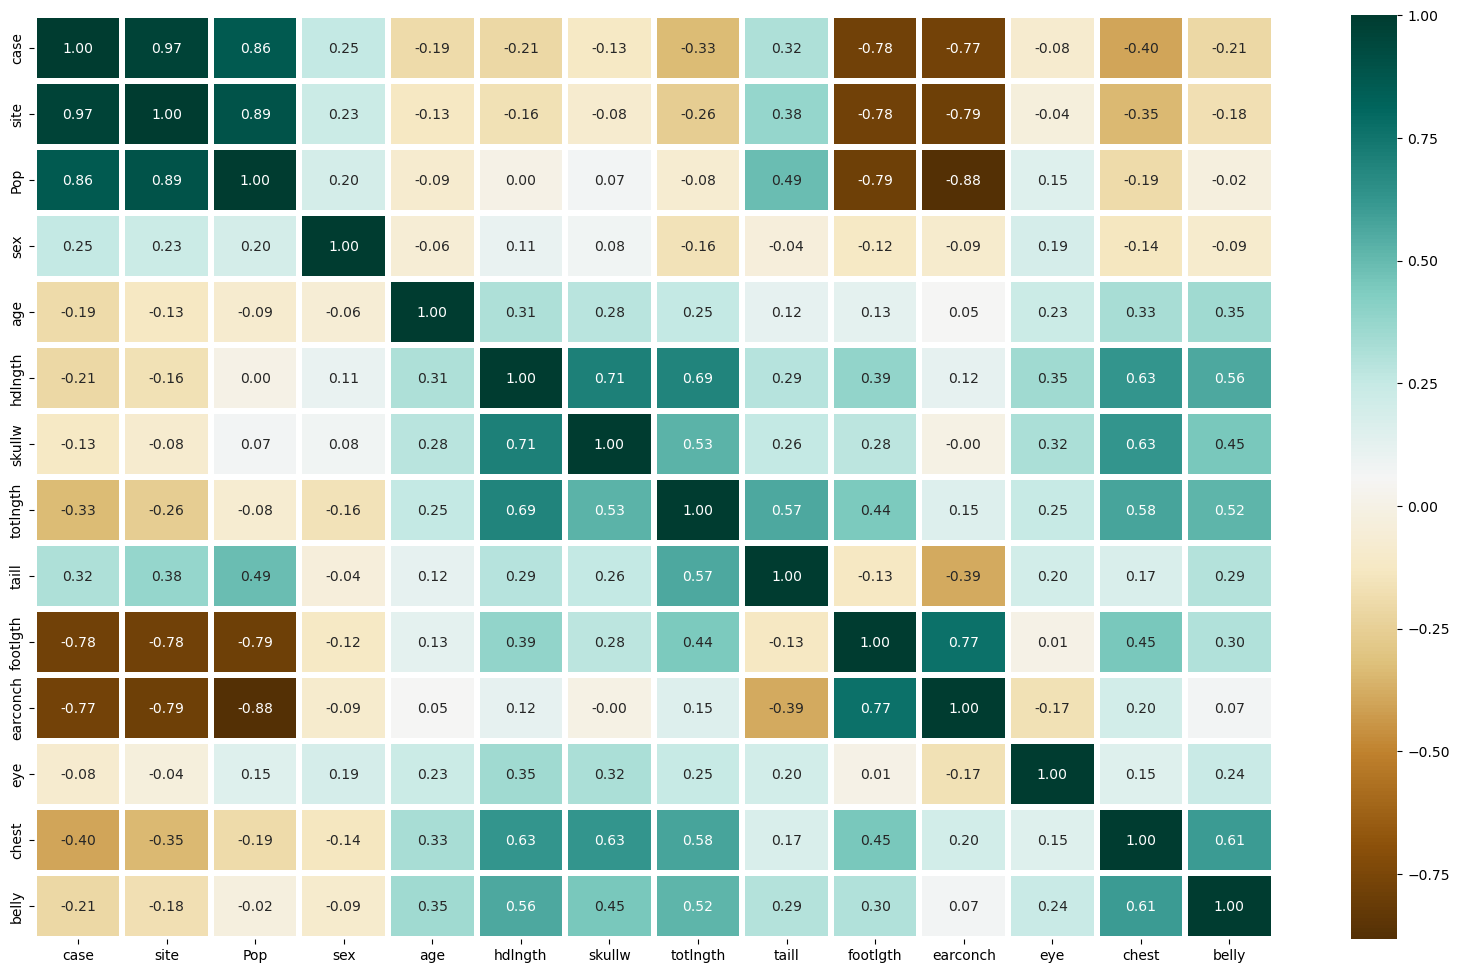

In [42]:
corr = df.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()


Наблюдаем много коррелирующих значений 

Длина всего тела (totalngth) зависит от признаков belly, chest, footlgth,taill, skullw, hdlngth.


## Моделирование

In [23]:

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [24]:
features_names = ['case','site', 'Pop', 'sex' , 'age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch',
                  'eye', 'chest', 'belly']
X = df[features_names]
print(X.shape)

(104, 13)


In [25]:
y = df["totlngth"]
y.value_counts()

totlngth
890.0    10
850.0     8
840.0     7
895.0     6
915.0     5
880.0     5
885.0     4
855.0     4
810.0     4
910.0     4
860.0     4
930.0     3
820.0     3
830.0     3
805.0     3
825.0     3
900.0     3
905.0     3
920.0     3
865.0     2
815.0     2
845.0     2
870.0     2
940.0     1
937.0     1
955.0     1
960.0     1
935.0     1
925.0     1
760.0     1
770.0     1
750.0     1
965.0     1
875.0     1
Name: count, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mms = MinMaxScaler()
scaler = StandardScaler()
mms.fit(X_train)

xTrainNorm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
xTestNorm = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

(69, 13) (35, 13) (69,) (35,)


## Обучение моделй 

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## LinearRegression

In [29]:
reg = LinearRegression()
kf = KFold(10)
cross_val = cross_val_score(reg, X_train, y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV mean : 0.577


In [30]:
features_names = ['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch',
                  'eye', 'chest', 'belly']
X = df[features_names]
y = df["totlngth"]

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f' {np.mean(scores)}')

 0.6536779811142093


 ## LassoCV

In [31]:
model_lasso = LassoCV()
lasso = model_lasso.fit(xTrainNorm, y_train)
lasso_predict = lasso.predict(xTestNorm)
print('LassoCV:', r2_score(y_test, lasso_predict))

LassoCV: 0.6140687225993968


In [32]:
features_names = ['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch',
                  'eye', 'chest', 'belly']
X = df[features_names]
y = df["totlngth"]

model = LassoCV()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f' {np.mean(scores)}')

 0.7042369439282968


In [52]:
# Создание и обучение модели с гиперпараметрами
features_names = ['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch',
                  'eye', 'chest', 'belly']
X = df[features_names]
y = df["totlngth"]

model = LassoCV(
    alphas=[0.1, 1.0, 10.0], 
    cv=10,  
    max_iter=2000, 
    tol=1e-3,  
    random_state=42  
)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f' {np.mean(scores)}')

 0.7074355159068396


<Axes: xlabel='totlngth'>

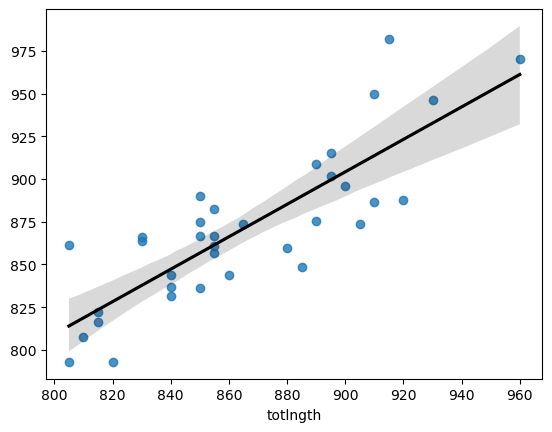

In [53]:
sns.regplot(x=y_test,y=elas_predict,line_kws={"color":"black"})

## RidgeCV

In [33]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()

ridge = model.fit(xTrainNorm, y_train)
ridge_predict = ridge.predict(xTestNorm)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('RidgeCV', r2_score(y_test, ridge_predict))


RidgeCV 0.5282694487146617


In [34]:
features_names = ['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch',
                  'eye', 'chest', 'belly']
X = df[features_names]
y = df["totlngth"]

model = RidgeCV()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f' {np.mean(scores)}')

 0.6905008206961311


## ElasticNetCV

In [35]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
elas = model.fit(xTrainNorm, y_train)
elas_predict = elas.predict(xTestNorm)
print( r2_score(y_test, elas_predict))

0.5887857544045674


In [36]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
import numpy as np

features_names = ['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch',
                  'eye', 'chest', 'belly']
X = df[features_names]
y = df["totlngth"]

model = ElasticNetCV()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f' {np.mean(scores)}')


 0.6939017001834057


<Axes: xlabel='totlngth'>

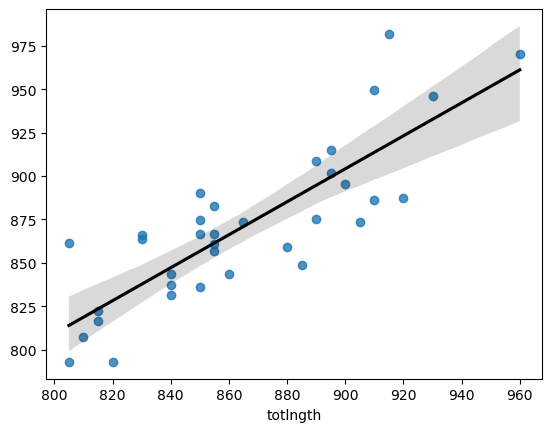

In [47]:
sns.regplot(x=y_test,y=elas_predict,line_kws={"color":"black"})

Точки находятся далеко от прямой, модель может часто оишбаться

## Гиперпараметры

### l1_ratio

In [37]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score

l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
alphas = [0.001, 0.01, 0.1, 1, 10]
cv = 10  
max_iter = 10000
tol = 1e-3
random_state = 42

model = ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas, cv=cv, max_iter=max_iter, tol=tol, random_state=random_state)

elas = model.fit(xTrainNorm, y_train)

elas_predict = elas.predict(xTestNorm)


print( r2_score(y_test, elas_predict))


0.5708636345956076


# Вывод

Всего было 104 строки и 14 признаков, 

Были обнаружены и заменили пропущенные значения на средение 

При иследованиях опоссумы в основном были в возрасте от 2-4 лет мужского пола

Наблюдалось много коррелирующих значений

Проведя исследование, при обучении модели лучший результат получили на модели LassoCV значением  0.7074355159068396